In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import utilities as ut
import cv2
import pandas as pd
import numpy as np

dataset_paths = ut.images_paths("Images/WarpedCards/")
base_cards_paths = ut.images_paths("Images/Cards/")




In [2]:
def append_data(row):
    data=row["moments"].copy()
    np.append(data,row["hue"])
    return data

In [23]:
labels = []
hu_moments = []
average_hue=[]
samples=[]
for path in dataset_paths:
    samples.append(ut.label_properties(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_raw = pd.DataFrame(samples)
df_raw["moments"] = hu_moments
df_raw["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_raw)

    value seed label index                                            moments  \
0       9    O     9     9  [0.2420585691853076, 0.014658985855505513, 0.0...   
1       6    O     O     O  [0.15926397496704947, 1.0749066817999338e-05, ...   
2       5    O     O     O  [0.1592484937500357, 2.673962087485381e-05, 1....   
3       4    C     C     C  [0.2094477692330109, 0.012637029346556467, 0.0...   
4       3    C     C     C  [0.21035288394729726, 0.01278347949375585, 0.0...   
..    ...  ...   ...   ...                                                ...   
315     5    B     B     B  [0.3380438243757439, 0.08547487205128075, 0.00...   
316     6    C     C     C  [0.23055099267648782, 0.019595342421635794, 0....   
317     5    B     B     B  [0.35050366109303394, 0.09402761404830294, 0.0...   
318     3    C     C     C  [0.2100594749117202, 0.012637268336815444, 0.0...   
319     5    C     C     C  [0.2153048524570926, 0.015194095308452601, 0.0...   

           hue             

In [5]:
labels = []
hu_moments = []
samples=[]
average_hue=[]
for path in base_cards_paths:
    samples.append(ut.label_class_only(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_base = pd.DataFrame(samples)
df_base["moments"] = hu_moments
df_base["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_base)


   value seed label                                            moments  \
0      3    O     O  [0.15920075204434575, 1.0225554255863776e-05, ...   
1      9    S     9  [0.23287943709971057, 0.0174506665564684, 0.00...   
2      5    B     B  [0.3382727483180074, 0.08558264344679267, 0.00...   
3      7    S     7  [0.7297026606466638, 0.1525497918209893, 0.238...   
4      2    O     O  [0.15919286518143894, 9.538238490725899e-06, 1...   
5      4    O     4  [0.2477914064384441, 0.015283636905452059, 0.0...   
6      4    C     C  [0.21434503180313857, 0.014699490411619578, 0....   
7      R    O     R  [0.2824338873316048, 0.046656305402199255, 0.0...   
8      6    O     O  [0.15928261477650016, 7.6278538613511295e-06, ...   
9      7    O     O  [0.15926755835462658, 3.099662896011585e-06, 6...   
10     3    B    3B  [0.31565626786572565, 0.047078958799786456, 0....   
11     9    O     9  [0.23227468968968612, 0.011597039592196124, 0....   
12     R    S     R  [0.26084682365424

In [16]:
filter = ['O','B','S','C']

df_raw_filtered= df_raw#[(df_raw['label'].isin(filter))]
df_base_filtered= df_base#[df_base['label'].isin(filter)]
print(df_raw_filtered)

    value seed label index                                            moments  \
0       9    O     9     9  [0.2420585691853076, 0.014658985855505513, 0.0...   
1       6    O     O     O  [0.15926397496704947, 1.0749066817999338e-05, ...   
2       5    O     O     O  [0.1592484937500357, 2.673962087485381e-05, 1....   
3       4    C     C     C  [0.2094477692330109, 0.012637029346556467, 0.0...   
4       3    C     C     C  [0.21035288394729726, 0.01278347949375585, 0.0...   
..    ...  ...   ...   ...                                                ...   
315     5    B     B     B  [0.3380438243757439, 0.08547487205128075, 0.00...   
316     6    C     C     C  [0.23055099267648782, 0.019595342421635794, 0....   
317     5    B     B     B  [0.35050366109303394, 0.09402761404830294, 0.0...   
318     3    C     C     C  [0.2100594749117202, 0.012637268336815444, 0.0...   
319     5    C     C     C  [0.2153048524570926, 0.015194095308452601, 0.0...   

           hue             

In [17]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df_raw_filtered["data"].tolist())
Scaled_data=scaling.transform(df_raw_filtered["data"].tolist())
principal=PCA(n_components=7)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x.shape)

(320, 7)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,df_raw_filtered["label"].tolist(), test_size=0.2, random_state=42)
"""X_test = x
X_train = scaling.transform(df_base_filtered["data"].to_list())
y_test = df_raw_filtered["label"].tolist()
y_train = df_base_filtered["label"].tolist()"""


'X_test = x\nX_train = scaling.transform(df_base_filtered["data"].to_list())\ny_test = df_raw_filtered["label"].tolist()\ny_train = df_base_filtered["label"].tolist()'

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    'kernel': ['rbf', 'poly', 'sigmoid'] # Specifies the kernel type to be used in the algorithm
}
grid_svm = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_svm.fit(X_train, y_train)
f_clf = RandomForestClassifier(n_estimators=10)
f_clf = f_clf.fit(X_train,y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best Estimator:", grid_svm.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

In [20]:
test_image = cv2.imread('Images/Cards/2C.jpg')
contours = ut.preprocess_image(test_image)
moments = cv2.moments(contours[0])
hu_moment=scaling.transform([cv2.HuMoments(moments).flatten()])

print(grid_svm.predict(principal.transform(hu_moment)))

['5S']


In [21]:

#predictions = grid_svm.predict(X_test)
predictions = f_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.90625
Classification Report:
              precision    recall  f1-score   support

          2B       1.00      0.50      0.67         2
          2C       1.00      1.00      1.00         1
          2S       1.00      1.00      1.00         3
          3B       0.50      0.33      0.40         3
          3S       1.00      1.00      1.00         2
          4O       1.00      0.50      0.67         2
          5S       1.00      1.00      1.00         1
          7S       1.00      1.00      1.00         4
           8       0.70      0.88      0.78         8
           9       0.80      1.00      0.89         4
          AB       1.00      1.00      1.00         1
          AC       1.00      1.00      1.00         1
          AO       0.00      0.00      0.00         1
          AS       1.00      1.00      1.00         2
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00         9
           O       1.00      1.00      1

/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmavico/Desktop/Codice/project_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

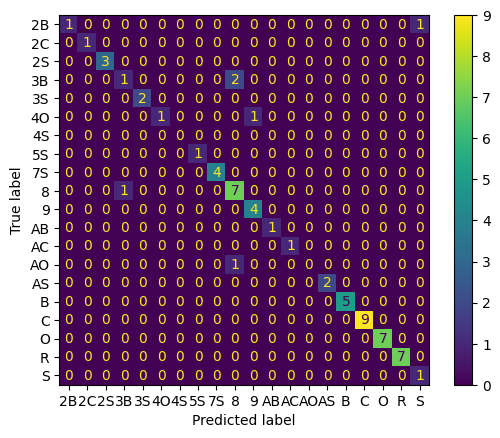

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=grid_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=grid_svm.classes_)
disp.plot()